Rarity Analysis will look at items listed in the catalog and measures how difficult it would be to acquire. 

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import plotly.express as px
from pathlib import Path

<h4>Folder nav</h4>

In [2]:
notebook_dir = Path.cwd() #get directory where this notebook is located
print(notebook_dir)
project_root = notebook_dir.parent #move up a directory
print(project_root)
output_file = project_root/'cleaned_data'/'items_with_rarity.csv'
print(output_file)
src_dir = project_root / 'src'
print(src_dir)

C:\Users\Code Lou\Documents\ACNH_Aesthetic_Rarity_Guide\notebooks
C:\Users\Code Lou\Documents\ACNH_Aesthetic_Rarity_Guide
C:\Users\Code Lou\Documents\ACNH_Aesthetic_Rarity_Guide\cleaned_data\items_with_rarity.csv
C:\Users\Code Lou\Documents\ACNH_Aesthetic_Rarity_Guide\src


In [3]:
if str(src_dir) not in sys.path:
    sys.path.append(str(src_dir))
print(f"current sys.path: {sys.path}")

current sys.path: ['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\python311.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0', 'C:\\Users\\Code Lou\\Documents\\ACNH_Aesthetic_Rarity_Guide\\venv', '', 'C:\\Users\\Code Lou\\Documents\\ACNH_Aesthetic_Rarity_Guide\\venv\\Lib\\site-packages', 'C:\\Users\\Code Lou\\Documents\\ACNH_Aesthetic_Rarity_Guide\\venv\\Lib\\site-packages\\win32', 'C:\\Users\\Code Lou\\Documents\\ACNH_Aesthetic_Rarity_Guide\\venv\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\Code Lou\\Documents\\ACNH_Aesthetic_Rarity_Guide\\venv\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\Code Lou\\Documents\\ACNH_Aesthetic_Rarity_Guide\\src']


<h4>Load data</h4>

In [4]:
rarity_df = pd.read_csv(output_file)
print(f"data loaded with {rarity_df.shape[0]} rows.")

data loaded with 8324 rows.


<h2>Rarity Visualizations</h2>

<h3>What is the distribution of rarity across items?</h3>

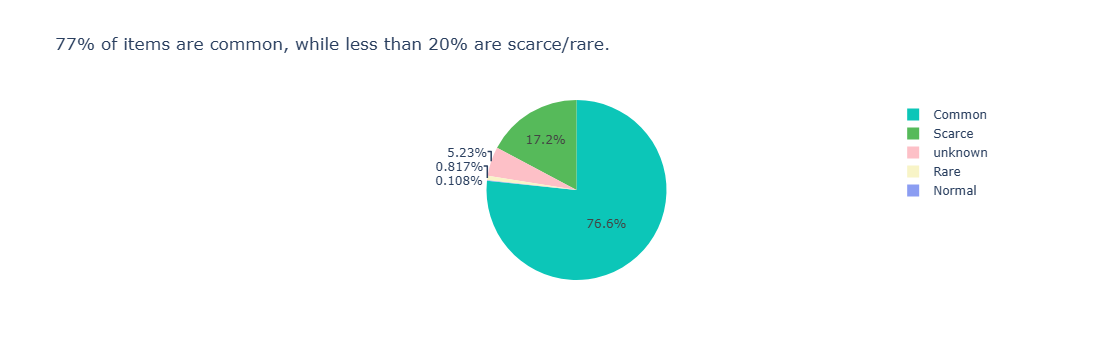

In [34]:
#Count occurrances of each value (Common, Normal, Scarce, Rare) in the dataframe
rarity_counts = rarity_df['Rarity'].value_counts().reset_index()
rarity_counts.columns = ['Rarity', 'Count']
fig = px.pie(
    rarity_counts,
    names='Rarity',
    values='Count',
    title='77% of items are common, while less than 20% are scarce/rare.',
    color_discrete_sequence=['#0cc6b8', '#56ba5a', '#fdc0c7', '#f8f4c7', '#8b9df2']
)
fig.show()

<h3>Are Redd's Treasures Real or Fake?</h3>

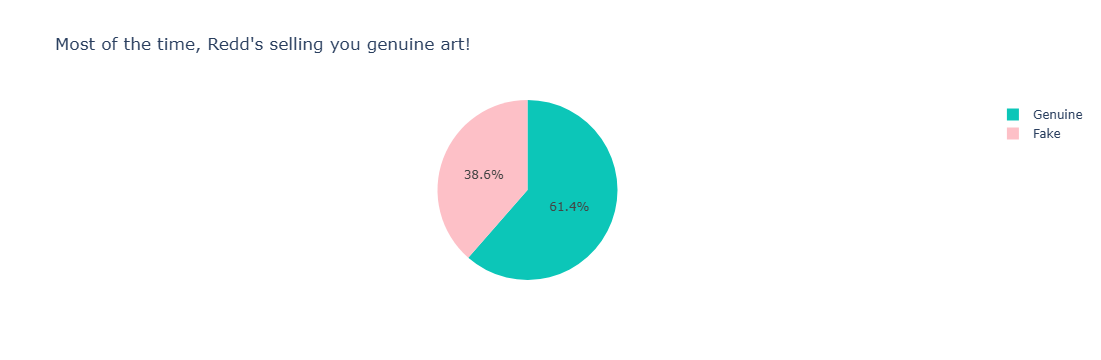

In [32]:
art_df = rarity_df[rarity_df['Item Type'].str.lower()== 'art'] #filter data to only include art
genuine_count = art_df['Genuine'].value_counts().reset_index()
genuine_count.columns = ['Genuine', 'Count']
custom_labels = {
    'Yes': 'Genuine', #if yes, set to genuine
    'No': 'Fake' #if no, set to fake
}
genuine_count['Genuine'] = genuine_count['Genuine'].map(custom_labels) #Replace the labels in the column as defined above
fig = px.pie(
    genuine_count,
    names='Genuine',
    values='Count',
    title="Most of the time, Redd's selling you genuine art!",
    color_discrete_sequence=['#0cc6b8', '#fdc0c7']
)
fig.show()

<h3>Do items often have seasonal restrictions?</h3>

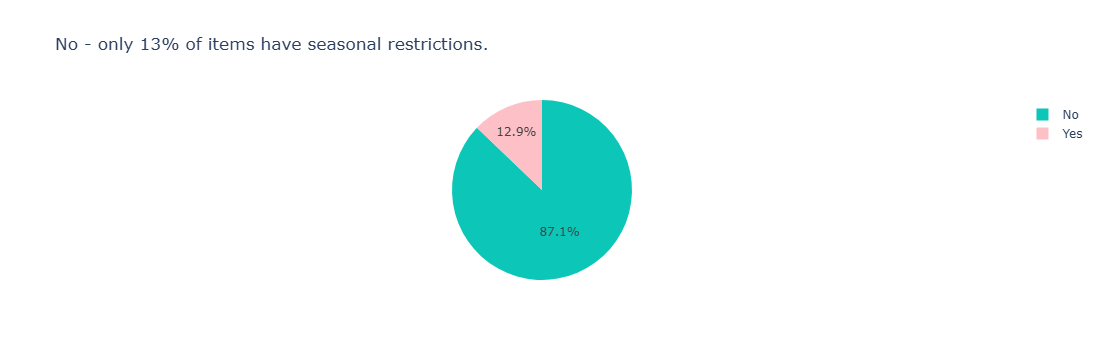

In [31]:
rarity_df['Seasonality Group'] = rarity_df['Seasonal Availability'].apply(lambda x: 'Yes' if x in ['Spring', 'Fall', 'Summer', 'Winter'] else 'No') #categorize into 'Season Specific' or 'No Season restrictions'
fig = px.pie(
    rarity_df,
    names='Seasonality Group',
    title="No - only 13% of items have seasonal restrictions.",
    color='Seasonality Group',
    color_discrete_sequence=['#0cc6b8', '#fdc0c7']
)
fig.show()

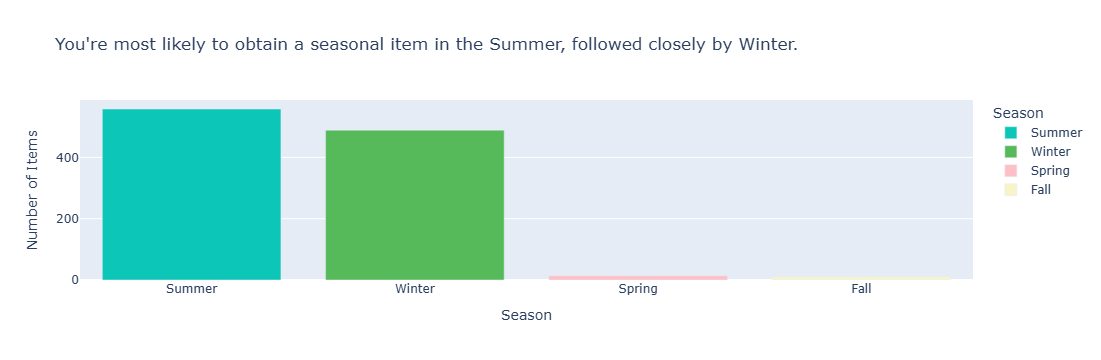

In [43]:
seasonal_df = rarity_df[rarity_df['Seasonal Availability'].isin(['Fall', 'Winter', 'Spring', 'Summer'])]
season_count = seasonal_df['Seasonal Availability'].value_counts().reset_index()
season_count.columns = ['Season', 'Count']
fig = px.bar(
    season_count,
    x='Season',
    y='Count',
    title="You're most likely to obtain a seasonal item in the Summer, followed closely by Winter.",
    labels={'Season': 'Season', 'Count': 'Number of Items'},
    color='Season',
    color_discrete_sequence=['#0cc6b8', '#56ba5a', '#fdc0c7', '#f8f4c7', '#8b9df2']
)
fig.show()